# Classification

- Linear Model -: LinearRegression, LogisticRegression
- Non Linear Model -: KNN, SVM, DT, RF

1. KNN is supervised,Non-Linear Machine Learning Model
2. KNN is also called as Lazy Algorithm, since it cannot learn from itself.
3. It Classifies based on similarity measures, i.e Eucleadian Distance/ Manhatan Distance
4. If we use it for Regression, it computes the mean value.
5. If we use it for Classification it computes the mode value.;
6. If we have even no of categories, the value of K should be odd no and viz
7. KNN is Computationally expensive model

It is suggested that if u have even no. of categories to predict,take k as odd and for odd no. of categories ,take k as even.Because in case of 2 categories and k=2,there might be a chance that, 1 point belong to 1 category and another point belong to anther category,at that time it will be a draw. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()
# gender is of object type which is a categorical data, 400 rows 5 cols.No null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()
#Age mean and median are similar.Normal distribution.
# 1 unit of diference between estimated salary mean and median.

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.Purchased.value_counts()
# 257 didnot purchased anything
# 143 purchased
# distribution is imbalanced.Less data in category 1 morein 2.Thta is values are not equally distributed.

0    257
1    143
Name: Purchased, dtype: int64

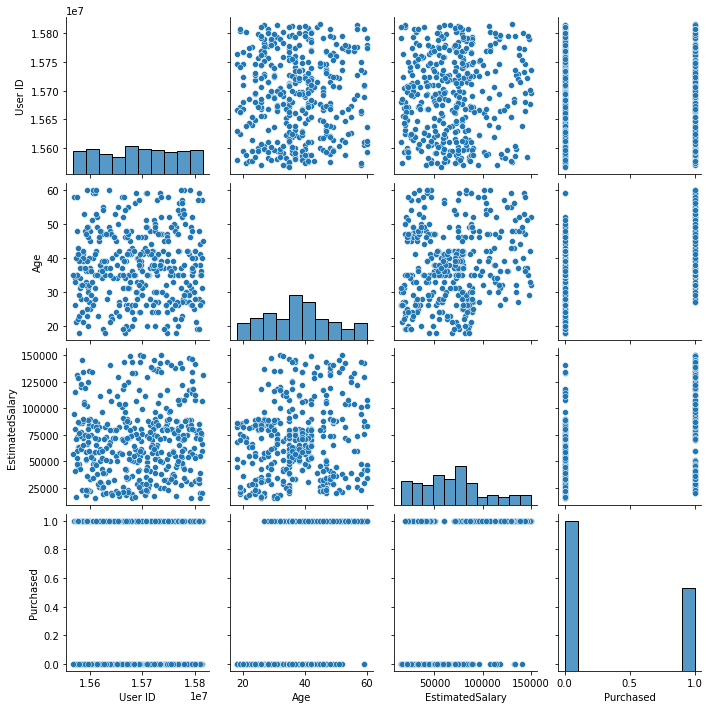

In [6]:
# now we will  see the distribution of data
sns.pairplot(df)


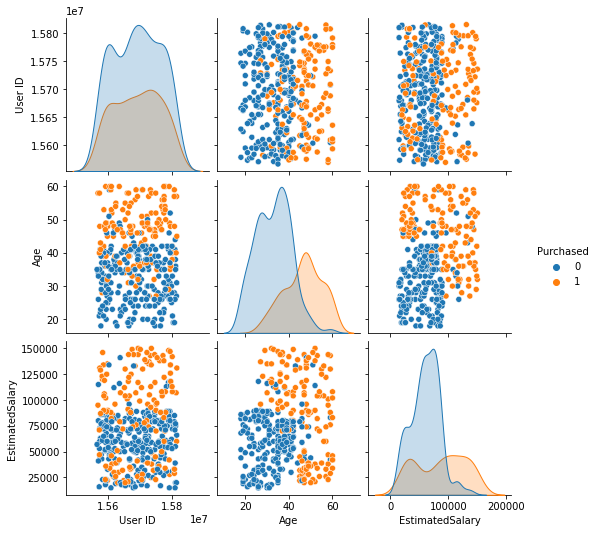

In [7]:
# above pairplot is not giving some nice insight. So trying for distribution wrt purchase.
sns.pairplot(df, hue="Purchased")

Above pairplot says that, data is surely differentiable and we can have some hyperplane distinguishing the two categories. 

Now,creating our model

In [8]:
x = df.iloc[:, [2,3]]# allrows of 2nd and 3rd col.
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [10]:
#step1 -: import the model
from sklearn.neighbors import KNeighborsClassifier

#step2 -: create the object
knn = KNeighborsClassifier(n_neighbors=5)

#step3 -: train the model
knn.fit(xtrain, ytrain)

#step4 -: make prediction
ypred = knn.predict(xtest)

# Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy -: {ac}\n{cm}\n\n{cr}")

# Accuracy ofour model is 83%

Accuracy -: 0.83
[[59  9]
 [ 8 24]]

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.73      0.75      0.74        32

    accuracy                           0.83       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



In [12]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)

print(f"Training Accuracy -: {train}\nTesting Accuracy -: {test}")

Training Accuracy -: 0.8766666666666667
Testing Accuracy -: 0.83


# Hyperparameter Tuning

In [13]:
trainac =[]
testac =[]

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train = knn.score(xtrain, ytrain)
    test = knn.score(xtest, ytest)
    
    trainac.append(train)
    testac.append(test)    

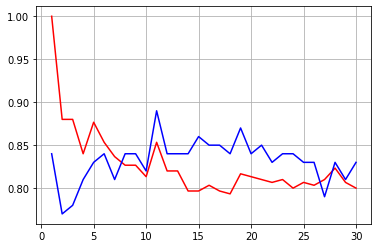

In [14]:
plt.plot(range(1,31), trainac, color="red")
plt.plot(range(1,31), testac, color="blue")
plt.grid()

In [15]:
#step1 -: import the model
from sklearn.neighbors import KNeighborsClassifier

#step2 -: create the object
knn = KNeighborsClassifier(n_neighbors=6)

#step3 -: train the model
knn.fit(xtrain, ytrain)

#step4 -: make prediction
ypred = knn.predict(xtest)

In [16]:
ac = accuracy_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy -: {ac}\n{cm}\n\n{cr}")

Accuracy -: 0.84
[[64  4]
 [12 20]]

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        68
           1       0.83      0.62      0.71        32

    accuracy                           0.84       100
   macro avg       0.84      0.78      0.80       100
weighted avg       0.84      0.84      0.83       100



In [17]:
train = knn.score(xtrain, ytrain)
test = knn.score(xtest, ytest)

print(f"Training Accuracy -: {train}\nTesting Accuracy -: {test}")

Training Accuracy -: 0.8533333333333334
Testing Accuracy -: 0.84


# Forecasting New Observation

In [18]:
def purchase():
    age = float(input("Enter Customers Age : "))
    es = float(input("Enter Customers Salary : "))
    newob = [[age, es]]
    yp = knn.predict(newob)[0]
    if(yp==1):
        print("Yes, the customer will definitely purchase the product")
    else:
        print("No, the customer will not at all purchase the product")
    return yp

In [19]:
purchase()

Enter Customers Age : 30
Enter Customers Salary : 30000
No, the customer will not at all purchase the product


0